# Lexicon

In [ ]:
#load data
import pandas as pd
saran = pd.read_csv('saran_karyawan.csv')
saran.head()

,saran
0,Tidak Ada
1,Dipertahankan
2,Sepatu dan sandal yang berada di tangga sebelu...
3,Mungkin dengan adanya loker bisa lebih rapi lagi
4,Untuk dokumen lebih terorganisir dan lebih rap...


In [ ]:
#install Package
!pip install nlp-id
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 27.6 MB/s eta 0:00:00
  Created wheel for nlp-id: filename=nlp_id-0.1.15.0-py3-none-any.whl size=58153891 sha256=79783cea1e62b31f6353d4297256d9d8b656b7f494b9a1eae700617df1972898
  Stored in directory: /root/.cache/pip/wheels/85/34/2a/deaf7b7896a1eed336b874e1a7732588d40bb7bdc0a824e73e
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=ee59d4cfd24f12e9449340b4231e76f2ab885c2f1829d4c8c9e9595423af0ee8
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built nlp-id wget
  Attempting uninstall: pytest
    Found existing installation: pytest 7.4.4
    Uninstalling pytest-7.4.4:
      Successfully uninstalled pytest-7.4.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 

In [ ]:
#import libraries
import numpy as np #untuk komputasi numerik
import string, unicodedata #membantu mempermudah manipulasi data text (pengolahan data text)
import re #mencari pola kata spesifik yang dicari/mendeteksi pola tertentu dalam string
import pandas as pd #membuat data frame
from tqdm import tqdm, notebook
import matplotlib.pyplot as plt
import csv
import sys
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

if not sys.warnoptions:
  import warnings
  warnings.simplefilter("ignore")

In [ ]:
from sqlalchemy.sql.expression import true
#preprocessing

def preprocess(text):
    # Hapus non-ascii
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Menghapus Tanda Baca
    text = re.sub(r'[^\w]|_',' ', text)

    # Menghapus Angka
    text = re.sub("\S*\d\S*", "", text).strip()
    text = re.sub(r"\b\d+\b", " ", text)

    # Mengubah text menjadi lowercase
    text = text.lower()

    # Menghapus white space
    text = re.sub('[\s]+', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text

    return text

In [ ]:
saran['casefolding'] = saran['saran'].apply(preprocess)
saran.head()

,saran,casefolding
0,Tidak Ada,tidak ada
1,Dipertahankan,dipertahankan
2,Sepatu dan sandal yang berada di tangga sebelu...,sepatu dan sandal yang berada di tangga sebelu...
3,Mungkin dengan adanya loker bisa lebih rapi lagi,mungkin dengan adanya loker bisa lebih rapi lagi
4,Untuk dokumen lebih terorganisir dan lebih rap...,untuk dokumen lebih terorganisir dan lebih rap...


In [ ]:
def split_word(teks):
    list_teks = []
    for txt in teks.split(" "):
        list_teks.append(txt)
    return list_teks

saran['split_casefolding'] = saran['casefolding'].apply(split_word)

In [ ]:
#slangwords
normalized_word = pd.read_csv('kamusalay.csv')

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

saran['slangword_saran'] = saran['split_casefolding'].apply(normalized_term)
saran.head()

,saran,casefolding,split_casefolding,slangword_saran
0,Tidak Ada,tidak ada,"[tidak, ada]","[tidak, ada]"
1,Dipertahankan,dipertahankan,[dipertahankan],[dipertahankan]
2,Sepatu dan sandal yang berada di tangga sebelu...,sepatu dan sandal yang berada di tangga sebelu...,"[sepatu, dan, sandal, yang, berada, di, tangga...","[sepatu, dan, sandal, yang, berada, di, tangga..."
3,Mungkin dengan adanya loker bisa lebih rapi lagi,mungkin dengan adanya loker bisa lebih rapi lagi,"[mungkin, dengan, adanya, loker, bisa, lebih, ...","[mungkin, dengan, adanya, loker, bisa, lebih, ..."
4,Untuk dokumen lebih terorganisir dan lebih rap...,untuk dokumen lebih terorganisir dan lebih rap...,"[untuk, dokumen, lebih, terorganisir, dan, leb...","[untuk, dokumen, lebih, terorganisir, dan, leb..."


In [ ]:
#stopword
import nltk
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
stop.extend(['nya', 'sih', 'ya', 'ac', 'pkm', 'by', 'llpop', 'nasi', 'apollo', 'oom', 'ol', 'kokpkokpm', 'mm',
             'aja', 'in', 'tis', 'tiiiss', 'ww', 'ad', 'aj', 'aja', 'ajaa', 'ak', 'alhamdulillah', 'all',
             'alplikasi', 'ama', 'amiiiinnn', 'an', 'ank', 'ap', 'dal', 'deeeh', 'deehh', 'deh', 'dan',
             'diapps', 'dung', 'eeee', 'eh', 'nya', 'ku', 'ktnya', 'leta', 'lol', 'ma', 'mah', 'mang', 'ytc',
             'you', 'yes', 'yani', 'yaaaa', 'yaa', 'ya', 'wkwkwwk', 'wkwk', 'wkt', 'wiyung'
             ,'win', 'l', 'p', 'lt', 'hihi', 'huhu', 'hmm', 'yaaa', 'dll', 'kalo', 'guys', 'pc', 'cs', 'vynil', 'sgt', 'mantaaapsss', 'mas', 'rokimnya', 'hiks',
             'kluar', 'hehe', 'mlaca', 'div'])
#remove stopword
saran['slangword_saran'] = saran['slangword_saran'].apply(lambda x: ' '.join(x))
saran['stopword_saran'] = saran['slangword_saran'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
saran.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,saran,casefolding,split_casefolding,slangword_saran,stopword_saran
0,Tidak Ada,tidak ada,"[tidak, ada]",tidak ada,
1,Dipertahankan,dipertahankan,[dipertahankan],dipertahankan,dipertahankan
2,Sepatu dan sandal yang berada di tangga sebelu...,sepatu dan sandal yang berada di tangga sebelu...,"[sepatu, dan, sandal, yang, berada, di, tangga...",sepatu dan sandal yang berada di tangga sebelu...,sepatu sandal tangga rapi rak sandal sepatu
3,Mungkin dengan adanya loker bisa lebih rapi lagi,mungkin dengan adanya loker bisa lebih rapi lagi,"[mungkin, dengan, adanya, loker, bisa, lebih, ...",mungkin dengan adanya loker bisa lebih rapi lagi,loker rapi
4,Untuk dokumen lebih terorganisir dan lebih rap...,untuk dokumen lebih terorganisir dan lebih rap...,"[untuk, dokumen, lebih, terorganisir, dan, leb...",untuk dokumen lebih terorganisir dan lebih rap...,dokumen terorganisir rapi


In [ ]:
#stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

In [ ]:
saran['stemming_saran'] = saran['stopword_saran'].apply(stemming)
saran

,saran,casefolding,split_casefolding,slangword_saran,stopword_saran,stemming_saran
0,Tidak Ada,tidak ada,"[tidak, ada]",tidak ada,,
1,Dipertahankan,dipertahankan,[dipertahankan],dipertahankan,dipertahankan,tahan
2,Sepatu dan sandal yang berada di tangga sebelu...,sepatu dan sandal yang berada di tangga sebelu...,"[sepatu, dan, sandal, yang, berada, di, tangga...",sepatu dan sandal yang berada di tangga sebelu...,sepatu sandal tangga rapi rak sandal sepatu,sepatu sandal tangga rapi rak sandal sepatu
3,Mungkin dengan adanya loker bisa lebih rapi lagi,mungkin dengan adanya loker bisa lebih rapi lagi,"[mungkin, dengan, adanya, loker, bisa, lebih, ...",mungkin dengan adanya loker bisa lebih rapi lagi,loker rapi,loker rapi
4,Untuk dokumen lebih terorganisir dan lebih rap...,untuk dokumen lebih terorganisir dan lebih rap...,"[untuk, dokumen, lebih, terorganisir, dan, leb...",untuk dokumen lebih terorganisir dan lebih rap...,dokumen terorganisir rapi,dokumen organisir rapi
...,...,...,...,...,...,...
151,Aman,aman,[aman],aman,aman,aman
152,"Disediakan area parkir yang aman (tertutup), m...",disediakan area parkir yang aman tertutup mena...,"[disediakan, area, parkir, yang, aman, tertutu...",disediakan area parkir yang aman tertutup mena...,disediakan area parkir aman tertutup menambah ...,sedia area parkir aman tutup tambah perangkat ...
153,Oke,oke,[oke],oke,oke,oke
154,bisa dikasi jajan kayak dulu,bisa dikasi jajan kayak dulu,"[bisa, dikasi, jajan, kayak, dulu]",bisa dikasi jajan seperti dulu,dikasi jajan,kasi jajan


In [ ]:
saran.isna().sum()

saran                0
casefolding          0
split_casefolding    0
slangword_saran      0
stopword_saran       0
stemming_saran       0
dtype: int64

In [ ]:
#tokenizing
def split_word(teks):
    list_teks = []
    for txt in teks.split(" "):
        list_teks.append(txt)
    return list_teks

saran['tokenize_saran'] = saran['stemming_saran'].apply(split_word)
saran.head()

,saran,casefolding,split_casefolding,slangword_saran,stopword_saran,stemming_saran,tokenize_saran
0,Tidak Ada,tidak ada,"[tidak, ada]",tidak ada,,,[]
1,Dipertahankan,dipertahankan,[dipertahankan],dipertahankan,dipertahankan,tahan,[tahan]
2,Sepatu dan sandal yang berada di tangga sebelu...,sepatu dan sandal yang berada di tangga sebelu...,"[sepatu, dan, sandal, yang, berada, di, tangga...",sepatu dan sandal yang berada di tangga sebelu...,sepatu sandal tangga rapi rak sandal sepatu,sepatu sandal tangga rapi rak sandal sepatu,"[sepatu, sandal, tangga, rapi, rak, sandal, se..."
3,Mungkin dengan adanya loker bisa lebih rapi lagi,mungkin dengan adanya loker bisa lebih rapi lagi,"[mungkin, dengan, adanya, loker, bisa, lebih, ...",mungkin dengan adanya loker bisa lebih rapi lagi,loker rapi,loker rapi,"[loker, rapi]"
4,Untuk dokumen lebih terorganisir dan lebih rap...,untuk dokumen lebih terorganisir dan lebih rap...,"[untuk, dokumen, lebih, terorganisir, dan, leb...",untuk dokumen lebih terorganisir dan lebih rap...,dokumen terorganisir rapi,dokumen organisir rapi,"[dokumen, organisir, rapi]"


In [ ]:
def filter_short_words(text):
    words = text.split()
    filtered_words = [word for word in words if len(word) >= 2]
    return ' '.join(filtered_words)

saran['teksbersih']= saran['stemming_saran'].apply(filter_short_words)
saran['teksbersih']= saran['tokenize_saran'].apply(lambda x: ' '.join(x))

# Export to csv file
saran.to_csv(r'saran_clean.csv', index = False, header = True,index_label=None)
saran

,saran,casefolding,split_casefolding,slangword_saran,stopword_saran,stemming_saran,tokenize_saran,teksbersih
0,Tidak Ada,tidak ada,"[tidak, ada]",tidak ada,,,[],
1,Dipertahankan,dipertahankan,[dipertahankan],dipertahankan,dipertahankan,tahan,[tahan],tahan
2,Sepatu dan sandal yang berada di tangga sebelu...,sepatu dan sandal yang berada di tangga sebelu...,"[sepatu, dan, sandal, yang, berada, di, tangga...",sepatu dan sandal yang berada di tangga sebelu...,sepatu sandal tangga rapi rak sandal sepatu,sepatu sandal tangga rapi rak sandal sepatu,"[sepatu, sandal, tangga, rapi, rak, sandal, se...",sepatu sandal tangga rapi rak sandal sepatu
3,Mungkin dengan adanya loker bisa lebih rapi lagi,mungkin dengan adanya loker bisa lebih rapi lagi,"[mungkin, dengan, adanya, loker, bisa, lebih, ...",mungkin dengan adanya loker bisa lebih rapi lagi,loker rapi,loker rapi,"[loker, rapi]",loker rapi
4,Untuk dokumen lebih terorganisir dan lebih rap...,untuk dokumen lebih terorganisir dan lebih rap...,"[untuk, dokumen, lebih, terorganisir, dan, leb...",untuk dokumen lebih terorganisir dan lebih rap...,dokumen terorganisir rapi,dokumen organisir rapi,"[dokumen, organisir, rapi]",dokumen organisir rapi
...,...,...,...,...,...,...,...,...
151,Aman,aman,[aman],aman,aman,aman,[aman],aman
152,"Disediakan area parkir yang aman (tertutup), m...",disediakan area parkir yang aman tertutup mena...,"[disediakan, area, parkir, yang, aman, tertutu...",disediakan area parkir yang aman tertutup mena...,disediakan area parkir aman tertutup menambah ...,sedia area parkir aman tutup tambah perangkat ...,"[sedia, area, parkir, aman, tutup, tambah, per...",sedia area parkir aman tutup tambah perangkat ...
153,Oke,oke,[oke],oke,oke,oke,[oke],oke
154,bisa dikasi jajan kayak dulu,bisa dikasi jajan kayak dulu,"[bisa, dikasi, jajan, kayak, dulu]",bisa dikasi jajan seperti dulu,dikasi jajan,kasi jajan,"[kasi, jajan]",kasi jajan


In [ ]:
# Determine sentiment label of ulasan using indonesia sentiment lexicon
from google.colab import drive
drive.mount('/content/drive')

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('/content/drive/MyDrive/Proyek Akhir/lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('/content/drive/MyDrive/Proyek Akhir/lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of ulasan
def sentiment_analysis_lexicon_indonesia(text):
    words = text.split()
    #for word in text:
    score = 0
    for word in words:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positif'
    elif (score < 0):
        polarity = 'negatif'
    else:
        polarity = 'netral'
    return score, polarity

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hasil = saran['teksbersih'].apply(sentiment_analysis_lexicon_indonesia)
hasil = list(zip(*hasil))
saran['polarity_score'] = hasil[0]
saran['polarity'] = hasil[1]
print(saran['polarity'].value_counts())
saran

# Export to csv file
saran.to_csv(r'labelkelassenti.csv', index = False, header = True,index_label=None)
saran

negatif    59
positif    59
netral     38
Name: polarity, dtype: int64


,saran,casefolding,split_casefolding,slangword_saran,stopword_saran,stemming_saran,tokenize_saran,teksbersih,polarity_score,polarity
0,Tidak Ada,tidak ada,"[tidak, ada]",tidak ada,,,[],,0,netral
1,Dipertahankan,dipertahankan,[dipertahankan],dipertahankan,dipertahankan,tahan,[tahan],tahan,-1,negatif
2,Sepatu dan sandal yang berada di tangga sebelu...,sepatu dan sandal yang berada di tangga sebelu...,"[sepatu, dan, sandal, yang, berada, di, tangga...",sepatu dan sandal yang berada di tangga sebelu...,sepatu sandal tangga rapi rak sandal sepatu,sepatu sandal tangga rapi rak sandal sepatu,"[sepatu, sandal, tangga, rapi, rak, sandal, se...",sepatu sandal tangga rapi rak sandal sepatu,7,positif
3,Mungkin dengan adanya loker bisa lebih rapi lagi,mungkin dengan adanya loker bisa lebih rapi lagi,"[mungkin, dengan, adanya, loker, bisa, lebih, ...",mungkin dengan adanya loker bisa lebih rapi lagi,loker rapi,loker rapi,"[loker, rapi]",loker rapi,1,positif
4,Untuk dokumen lebih terorganisir dan lebih rap...,untuk dokumen lebih terorganisir dan lebih rap...,"[untuk, dokumen, lebih, terorganisir, dan, leb...",untuk dokumen lebih terorganisir dan lebih rap...,dokumen terorganisir rapi,dokumen organisir rapi,"[dokumen, organisir, rapi]",dokumen organisir rapi,1,positif
...,...,...,...,...,...,...,...,...,...,...
151,Aman,aman,[aman],aman,aman,aman,[aman],aman,5,positif
152,"Disediakan area parkir yang aman (tertutup), m...",disediakan area parkir yang aman tertutup mena...,"[disediakan, area, parkir, yang, aman, tertutu...",disediakan area parkir yang aman tertutup mena...,disediakan area parkir aman tertutup menambah ...,sedia area parkir aman tutup tambah perangkat ...,"[sedia, area, parkir, aman, tutup, tambah, per...",sedia area parkir aman tutup tambah perangkat ...,9,positif
153,Oke,oke,[oke],oke,oke,oke,[oke],oke,2,positif
154,bisa dikasi jajan kayak dulu,bisa dikasi jajan kayak dulu,"[bisa, dikasi, jajan, kayak, dulu]",bisa dikasi jajan seperti dulu,dikasi jajan,kasi jajan,"[kasi, jajan]",kasi jajan,-3,negatif


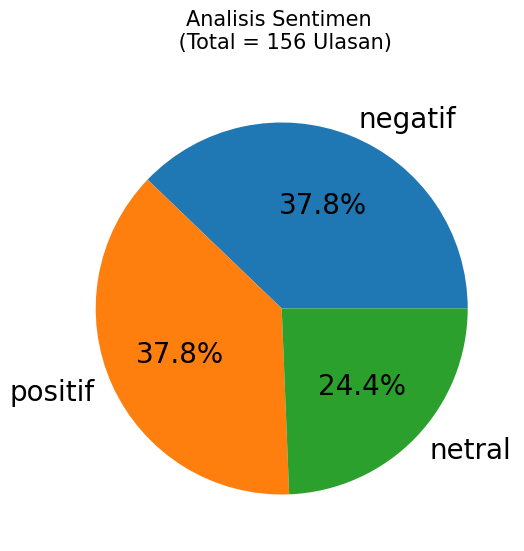

In [ ]:
#visualisasi pie chart
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6, 8))
size = [count for count in saran['polarity'].value_counts()]
label = list(saran['polarity'].value_counts().index)
ax.pie(x = size, labels = label, autopct='%1.1f%%', textprops = {'fontsize': 20})
ax.set_title('Analisis Sentimen \n (Total = 156 Ulasan)', fontsize = 15, pad = 20)
plt.show()

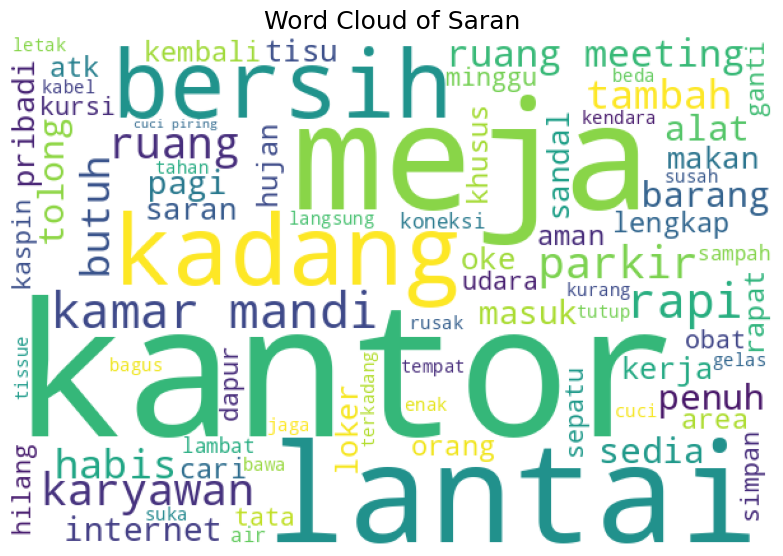

In [ ]:
# Visualize word cloud
from wordcloud import WordCloud

list_words=''
for text in saran['teksbersih']:
    list_words += ' '+ text

wordcloud = WordCloud(width = 600, height = 400, background_color = 'white', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Saran', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

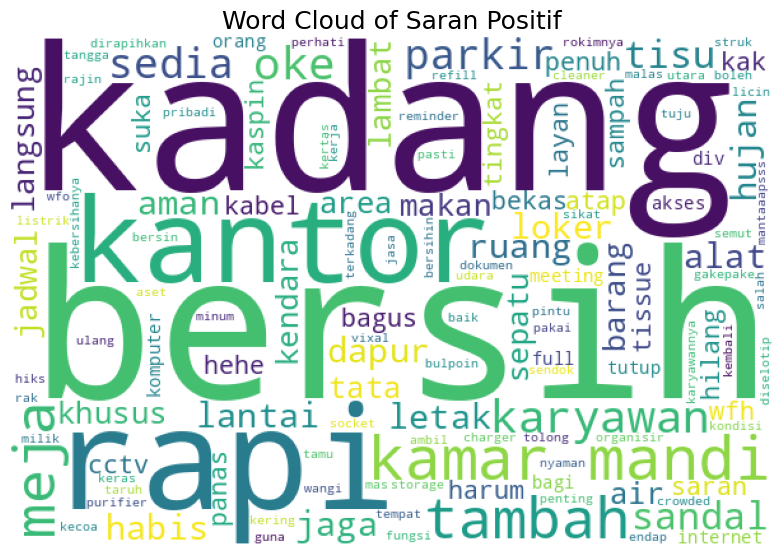

In [ ]:
# Visualize word cloud
from wordcloud import WordCloud
pos = saran[saran['polarity']=='positif']

list_words=''
for text in pos['teksbersih']:
    list_words += ' '+ text

wordcloud = WordCloud(width = 600, height = 400, background_color = 'white', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Saran Positif', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

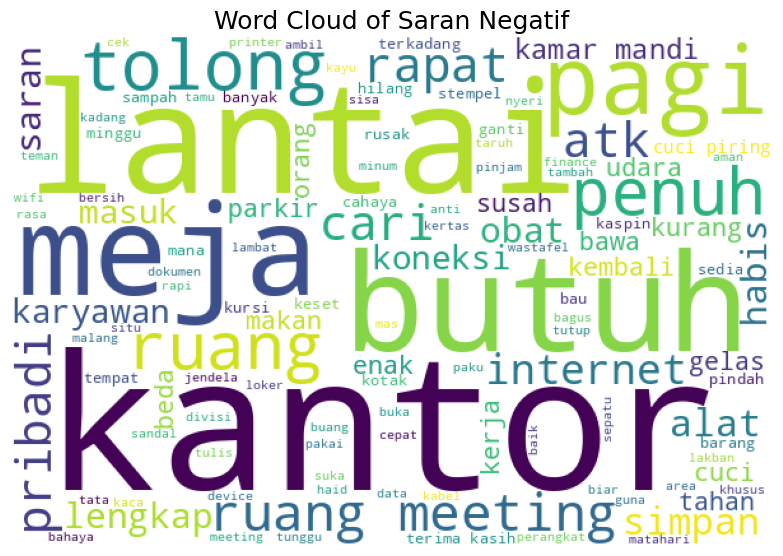

In [ ]:
# Visualize word cloud
from wordcloud import WordCloud
neg = saran[saran['polarity']=='negatif']

list_words=''
for text in neg['teksbersih']:
    list_words += ' '+ text

wordcloud = WordCloud(width = 600, height = 400, background_color = 'white', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Saran Negatif', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('labelkelasposneg.csv', usecols=['polarity', 'tokenize_saran'])
data.columns = ['saran', 'label']

data

,saran,label
0,['tahan'],negatif
1,"['sepatu', 'sandal', 'tangga', 'rapi', 'rak', ...",positif
2,"['loker', 'rapi']",positif
3,"['dokumen', 'organisir', 'rapi']",positif
4,['rapi'],positif
...,...,...
113,['aman'],positif
114,"['sedia', 'area', 'parkir', 'aman', 'tutup', '...",positif
115,['oke'],positif
116,"['kasi', 'jajan']",negatif


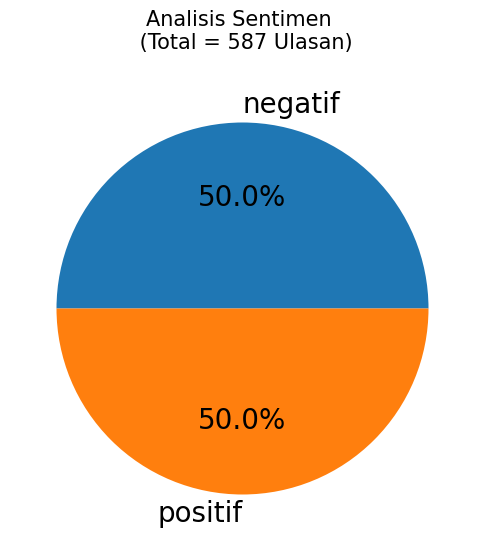

In [ ]:
#visualisasi pie chart
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6, 8))
size = [count for count in data['label'].value_counts()]
label = list(data['label'].value_counts().index)
ax.pie(x = size, labels = label, autopct='%1.1f%%', textprops = {'fontsize': 20})
ax.set_title('Analisis Sentimen \n (Total = 587 Ulasan)', fontsize = 15, pad = 20)
plt.show()

# LDA

In [ ]:
!pip install --upgrade gensim
!pip install --upgrade pyLDAvis
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn

In [ ]:
!pip install --upgrade pyLDAvis

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

In [ ]:
# membuat list dari data yang sudah melalui preprocessing
documents = [text.split() for text in saran['teksbersih']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# membuat dictionary dan document-term matrix (DTM)
dictionary = corpora.Dictionary(documents)
dtm = [dictionary.doc2bow(doc) for doc in documents]
dtm_df = pd.DataFrame([(dictionary[id], freq) for doc in dtm for id, freq in doc], columns=['Term', 'Frequency'])
print(dtm_df)

       Term  Frequency
0     tahan          1
1       rak          1
2      rapi          1
3    sandal          2
4    sepatu          2
..      ...        ...
900   jajan          1
901    kasi          1
902  lantai          1
903   kotak          1
904   saran          1

[905 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# mendefinisikan range dari kandidat jumlah topik
num_topics_range = range(1, 11)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# inisialisasi list untuk menyimpan perplexity dan coherence scores
perplexity_scores = []
coherence_scores = []

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# iterasi jumlah topik yang berbeda-beda
for num_topics in num_topics_range:
    # penerapan model LDA
    lda_model = gensim.models.LdaModel(dtm, num_topics=num_topics, id2word=dictionary)

    # perhitungan perplexity
    perplexity_score = lda_model.log_perplexity(dtm)
    perplexity_scores.append(perplexity_score)

    # perhitungan coherence score
    coherence_model_lda = gensim.models.CoherenceModel(
        model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# membuat DataFrame untuk menyimpan hasilnya
results_df = pd.DataFrame({'NumTopics': num_topics_range, 'Perplexity': perplexity_scores, 'Coherence': coherence_scores})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# menentukan jumlah topik optimal berdasarkan hasil
optimal_num_topics = results_df.loc[results_df['Perplexity'].idxmin()]['NumTopics']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# penerapan model LDA akhir dengan jumlah topik optimal
final_lda_model = gensim.models.LdaModel(dtm, num_topics=optimal_num_topics, id2word=dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


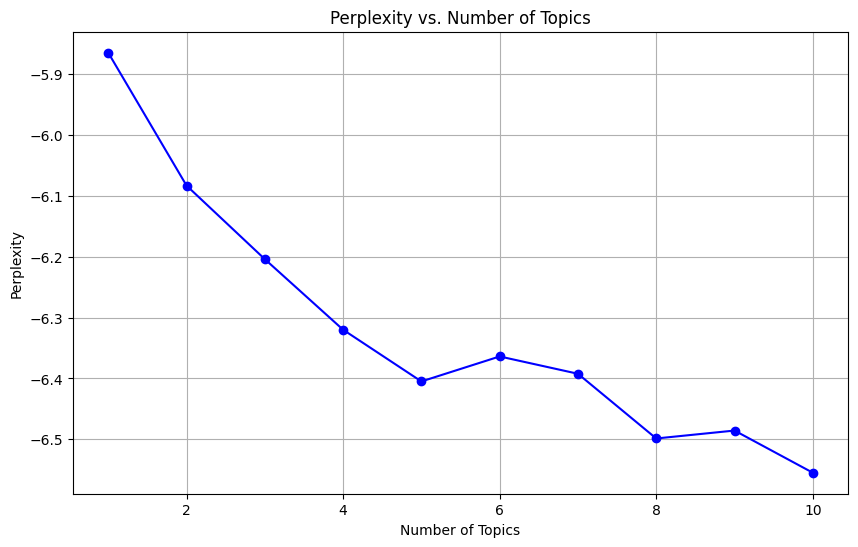

In [ ]:
# menampilkan perplexity scores
plt.figure(figsize=(10, 6))
plt.plot(results_df['NumTopics'], results_df['Perplexity'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.title('Perplexity vs. Number of Topics')
plt.grid(True)
plt.show()

In [ ]:
# display perplexity scores dalam tabel
perplexity_table = results_df[['NumTopics', 'Perplexity']]
print(perplexity_table)

   NumTopics  Perplexity
0          1   -5.865011
1          2   -6.083283
2          3   -6.204130
3          4   -6.320070
4          5   -6.405005
5          6   -6.363956
6          7   -6.392404
7          8   -6.498704
8          9   -6.485692
9         10   -6.554958


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


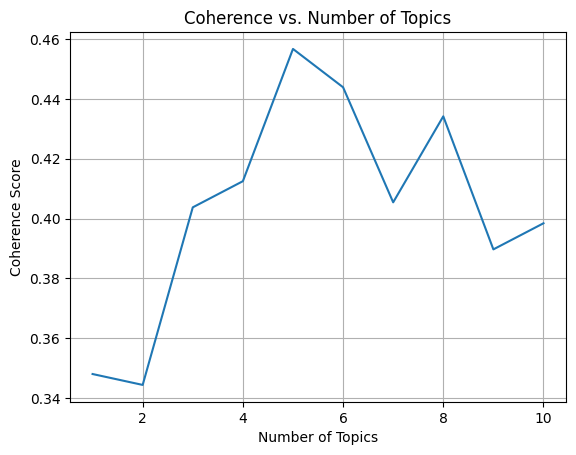

In [ ]:
# plot coherence scores
plt.plot(results_df['NumTopics'], results_df['Coherence'])
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence vs. Number of Topics')
plt.grid(True)
plt.show()

In [ ]:
# display coherence scores dalam tabel
coherence_table = results_df[['NumTopics', 'Coherence']]
print(coherence_table)

   NumTopics  Coherence
0          1   0.348031
1          2   0.344389
2          3   0.403734
3          4   0.412475
4          5   0.456679
5          6   0.443863
6          7   0.405409
7          8   0.434151
8          9   0.389686
9         10   0.398411


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# print topik-topik dan kata-kata terkait
for topic in final_lda_model.print_topics():
    print(topic)

(0, '0.063*"mandi" + 0.063*"kamar" + 0.032*"bersih" + 0.027*"sedia" + 0.027*"tisu" + 0.021*"meja" + 0.020*"kantor" + 0.016*"khusus" + 0.016*"tambah" + 0.016*"saran"')
(1, '0.035*"loker" + 0.031*"kadang" + 0.024*"meja" + 0.024*"air" + 0.017*"koneksi" + 0.015*"rusak" + 0.014*"makan" + 0.013*"karyawan" + 0.012*"rapi" + 0.012*"kantor"')
(2, '0.077*"oke" + 0.043*"minggu" + 0.015*"bersih" + 0.015*"kantor" + 0.015*"kak" + 0.015*"harum" + 0.015*"jaga" + 0.015*"lantai" + 0.015*"saran" + 0.015*"laundry"')
(3, '0.029*"pagi" + 0.026*"lantai" + 0.023*"rapi" + 0.023*"bersih" + 0.023*"tahan" + 0.021*"atk" + 0.018*"alat" + 0.018*"meja" + 0.018*"habis" + 0.012*"finance"')
(4, '0.055*"kantor" + 0.020*"tata" + 0.019*"orang" + 0.018*"internet" + 0.016*"koneksi" + 0.015*"parkir" + 0.015*"beda" + 0.013*"cctv" + 0.013*"perangkat" + 0.013*"hujan"')
(5, '0.030*"meja" + 0.030*"barang" + 0.025*"kembali" + 0.018*"kantor" + 0.016*"tolong" + 0.016*"sepatu" + 0.016*"sandal" + 0.016*"pribadi" + 0.016*"tambah" + 0.016

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print all the topics
for topic_id in range(final_lda_model.num_topics):
    topic = final_lda_model.show_topic(topic_id)
    print(f"Topic {topic_id + 1}: {topic}")

Topic 1: [('mandi', 0.06344039), ('kamar', 0.06343863), ('bersih', 0.03197942), ('sedia', 0.026738388), ('tisu', 0.026738152), ('meja', 0.021496007), ('kantor', 0.020299396), ('khusus', 0.016252771), ('tambah', 0.016252672), ('saran', 0.016252479)]
Topic 2: [('loker', 0.035034623), ('kadang', 0.03064984), ('meja', 0.023737075), ('air', 0.023736238), ('koneksi', 0.017296486), ('rusak', 0.014549269), ('makan', 0.013917561), ('karyawan', 0.013498161), ('rapi', 0.012434027), ('kantor', 0.012433865)]
Topic 3: [('oke', 0.0769031), ('minggu', 0.04254785), ('bersih', 0.015100432), ('kantor', 0.015099296), ('kak', 0.015098592), ('harum', 0.015098538), ('jaga', 0.015098482), ('lantai', 0.0150983455), ('saran', 0.01509817), ('laundry', 0.015098158)]
Topic 4: [('pagi', 0.028981313), ('lantai', 0.026222287), ('rapi', 0.023294663), ('bersih', 0.023293508), ('tahan', 0.023290833), ('atk', 0.020817073), ('alat', 0.01761598), ('meja', 0.017615763), ('habis', 0.017615762), ('finance', 0.011933297)]
Topi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install funcy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install tzdata

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install --no-deps pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# visualisasi topik menggunakan pyLDAvis
vis_data = gensimvis.prepare(final_lda_model, dtm, dictionary, sort_topics=False)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.